In [1]:
import os
os.getcwd()
os.chdir("G:/OneDrive/casa0010dissertation/00_06 jaipur code_mgwr")

In [2]:
# Exploratory PCA Analysis for Jaipur Economic Potential Index
# This script performs Principal Component Analysis to understand the underlying structure of economic indicators

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import geopandas as gpd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from time import time
import sys

In [61]:
# Basic plotting settings for matplotlib and seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

# Matplotlib figure DPI setting
mpl.rcParams['figure.dpi'] = 300

# Seaborn settings
sns.set_style("darkgrid")
sns.set_context(context="paper", font_scale=1.5, rc=None)
sns.set(font="serif")

# Additional libraries for geo-spatial analysis (if needed)
import geopandas as gpd
import contextily as cx
from matplotlib.colors import Normalize

In [5]:
# # Set pandas display options for better output formatting
pd.set_option('display.max_rows', 300)  # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format  # specifies default number format to 4 decimal places
#
# # Set matplotlib styling
# plt.style.use('ggplot')  # specifies that graphs should use ggplot styling

# Set random seed for reproducibility
np.random.seed(42)  # Set numpy random seed
rand_st_int = 42    # Random state integer for PCA

# 1 Load the prepare cleaned data

In [6]:
print("Step 1: Loading and preparing data...")

# Load the dataset from Parquet file
gdf = gpd.read_parquet("data/cleaned/pca/jaipur_hex_complete.parquet")

print(f"Dataset loaded successfully. Shape: {gdf.shape}")
print(f"Columns in dataset: {list(gdf.columns)}")

Step 1: Loading and preparing data...
Dataset loaded successfully. Shape: (1799, 16)
Columns in dataset: ['hex_id', 'geometry', 'cover', 'transport_station_point', 'transport_station_polygon', 'motorable_road_nexwork', 'amenities_poi', 'office_poi', 'shop_poi', 'area_clip', 'pop_sum', 'builtup_sum', 'ndvi_mean', 'ntl_mean', 'pop_density_km2', 'builtup_density']


In [7]:
print(f"Columns in dataset: {list(gdf.columns)}")

Columns in dataset: ['hex_id', 'geometry', 'cover', 'transport_station_point', 'transport_station_polygon', 'motorable_road_nexwork', 'amenities_poi', 'office_poi', 'shop_poi', 'area_clip', 'pop_sum', 'builtup_sum', 'ndvi_mean', 'ntl_mean', 'pop_density_km2', 'builtup_density']


In [9]:
# Define the 10 indicator columns for analysis
indicator_columns = [
    'transport_station_point',
    'transport_station_polygon',
    'motorable_road_nexwork',
    'amenities_poi',
    'office_poi',
    'shop_poi',
    'pop_density_km2',
    'builtup_density',
    'ndvi_mean',
    'ntl_mean'
]

# Create a DataFrame containing both hex_id and indicator columns
# This ensures we maintain spatial linkage throughout the analysis
analysis_columns = ['hex_id'] + indicator_columns
indicators_df = gdf[analysis_columns].copy()

print(f"Analysis DataFrame created with spatial ID. Shape: {indicators_df.shape}")
print(f"Columns: {list(indicators_df.columns)}")

# Display basic statistics of indicator variables (excluding hex_id column)
print("\nBasic statistics of indicator variables:")
print(indicators_df[indicator_columns].describe())

Analysis DataFrame created with spatial ID. Shape: (1799, 11)
Columns: ['hex_id', 'transport_station_point', 'transport_station_polygon', 'motorable_road_nexwork', 'amenities_poi', 'office_poi', 'shop_poi', 'pop_density_km2', 'builtup_density', 'ndvi_mean', 'ntl_mean']

Basic statistics of indicator variables:
                       transport_station_point  \
count                               1,799.0000   
mean                                    1.1433   
std                                     3.9207   
min                                     0.0000   
25%                                     0.0000   
50%                                     0.0000   
75%                                     0.0000   
max                                    46.1880   

                     transport_station_polygon  \
count                               1,799.0000   
mean                                    0.0079   
std                                     0.0717   
min                                  

In [10]:
# Preserve the spatial IDs for later use
spatial_ids = indicators_df['hex_id'].copy()
print(f"Preserved {len(spatial_ids)} spatial IDs for result mapping")

Preserved 1799 spatial IDs for result mapping


# 2 log transform the data

In [16]:
print("\nStep 2: Applying log transformation to right-skewed variables...")

# Define the severely right-skewed variables that need log transformation
skewed_variables = [
    'transport_station_point',
    'transport_station_polygon',
    'amenities_poi',
    'office_poi',
    'shop_poi',
    'pop_density_km2',
            'motorable_road_nexwork',
     'builtup_density',
    'ntl_mean',


]

# Define variables that will remain untransformed
untransformed_variables = [
    #     'motorable_road_nexwork',
    #  'builtup_density',
    # 'ntl_mean',
    'ndvi_mean',
]

# Create a copy for processing (only indicator columns for transformation)
processed_df = indicators_df[indicator_columns].copy()

# Apply log(x + 1) transformation to skewed variables
print("Applying log(x + 1) transformation to:")
for var in skewed_variables:
    print(f"  - {var}")
    processed_df[var] = np.log1p(processed_df[var])

print(f"Variables kept in original form: {untransformed_variables}")

# Display statistics after transformation
print("\nStatistics after log transformation:")
print(processed_df[skewed_variables].describe())


Step 2: Applying log transformation to right-skewed variables...
Applying log(x + 1) transformation to:
  - transport_station_point
  - transport_station_polygon
  - amenities_poi
  - office_poi
  - shop_poi
  - pop_density_km2
  - motorable_road_nexwork
  - builtup_density
  - ntl_mean
Variables kept in original form: ['ndvi_mean']

Statistics after log transformation:
                       transport_station_point  \
count                               1,799.0000   
mean                                    0.2557   
std                                     0.7394   
min                                     0.0000   
25%                                     0.0000   
50%                                     0.0000   
75%                                     0.0000   
max                                     3.8541   

                     transport_station_polygon  \
count                               1,799.0000   
mean                                    0.0061   
std                      

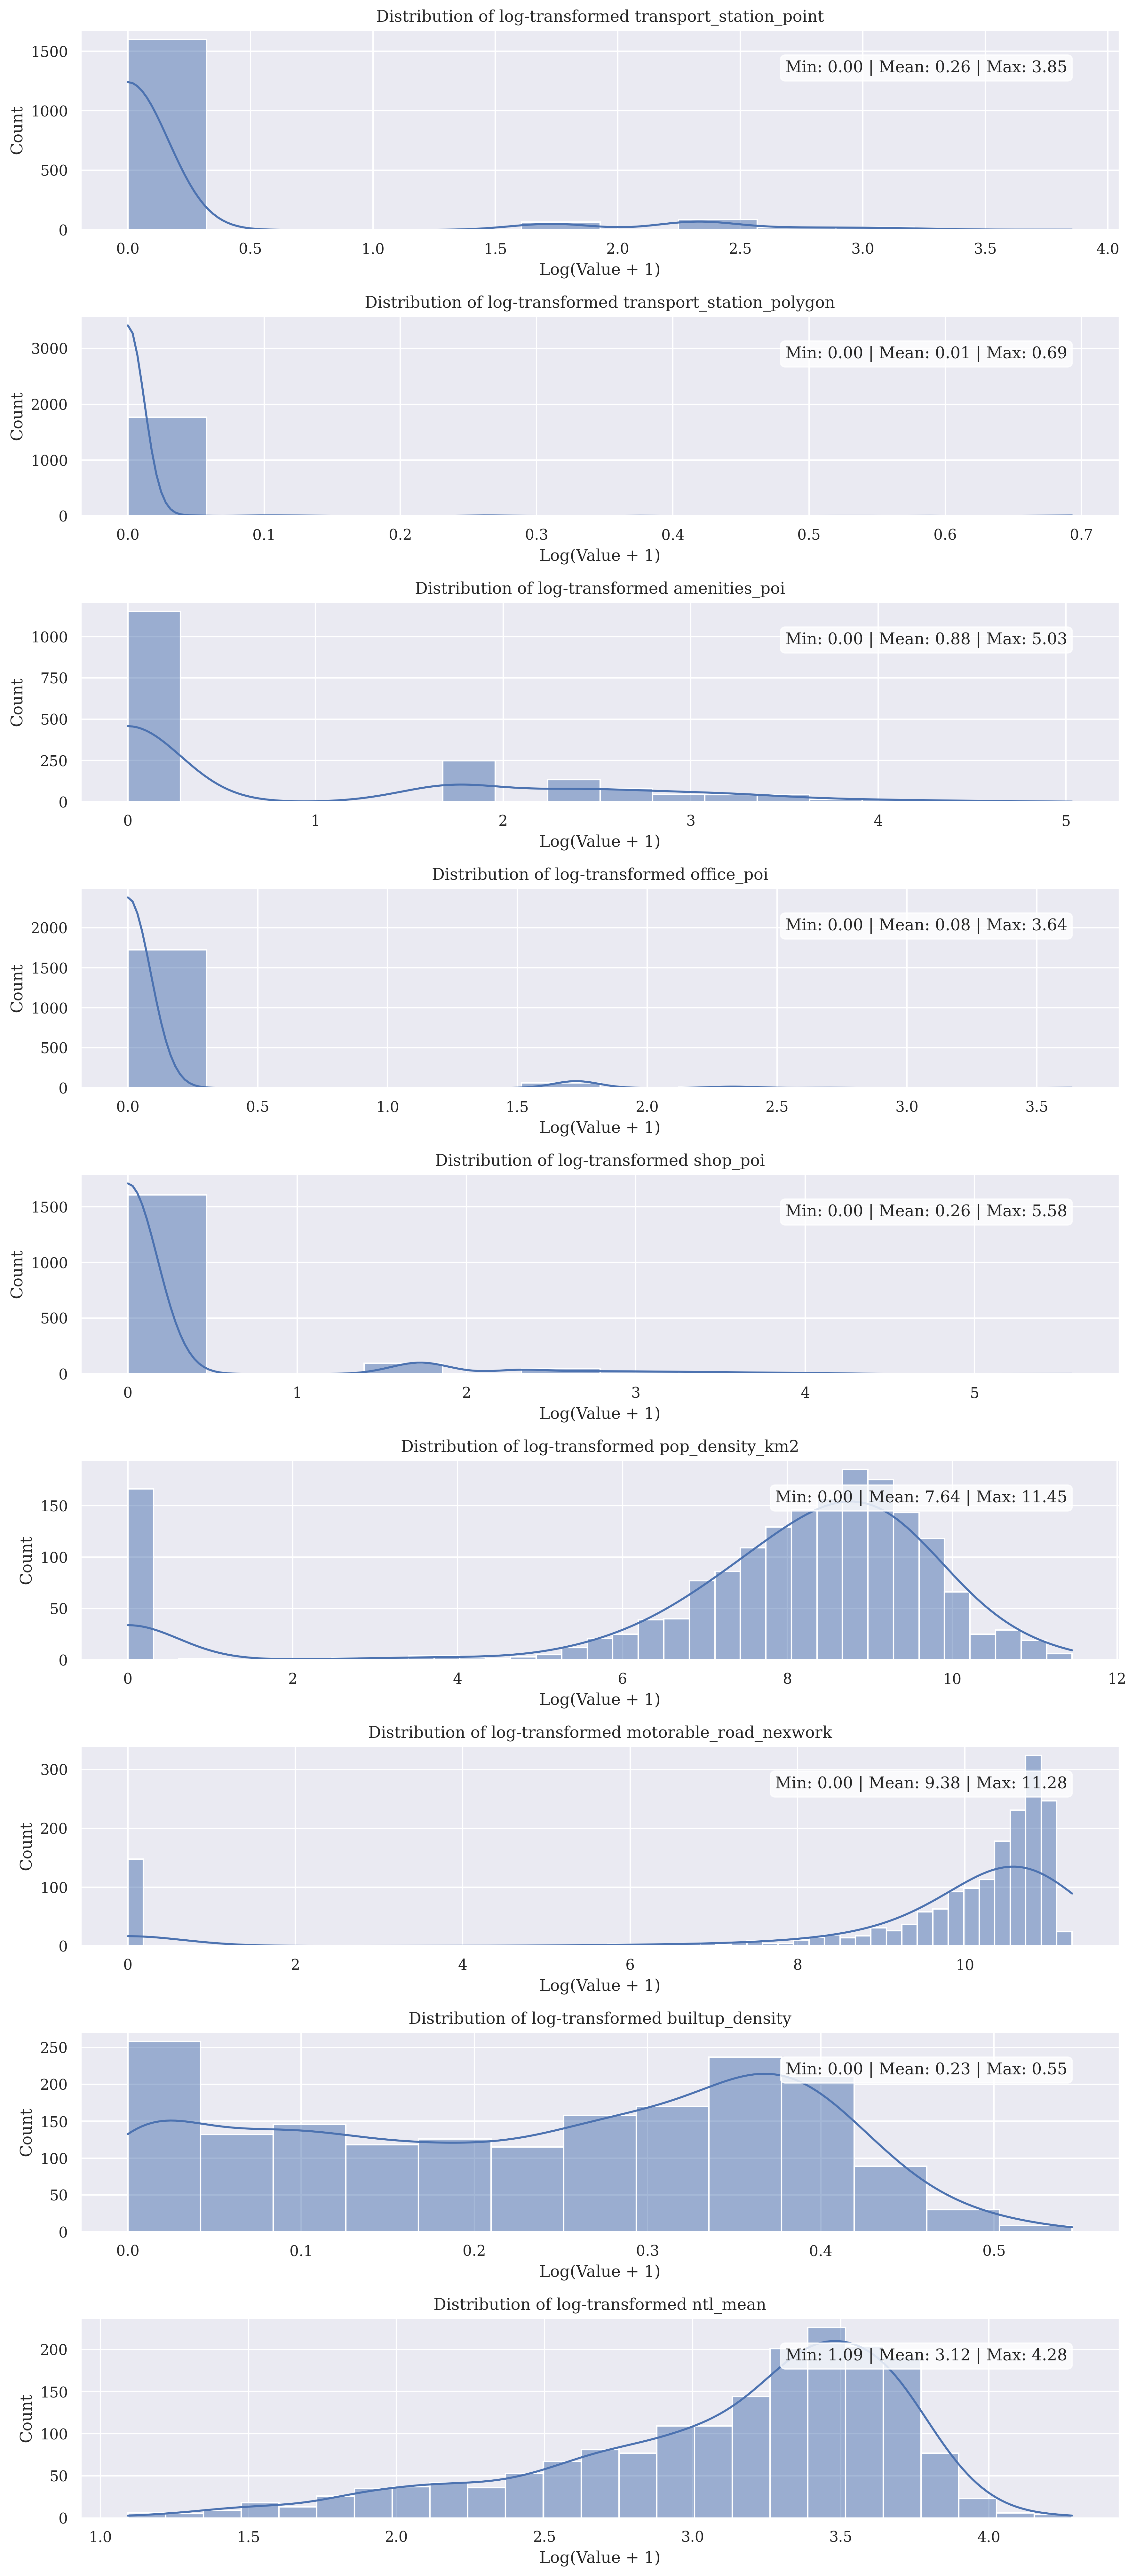

In [13]:
# # Create histograms for the log-transformed variables
# fig, axes = plt.subplots(len(skewed_variables), 1, figsize=(12, 3*len(skewed_variables)))
#
# # Create histograms for each transformed column
# for i, col in enumerate(skewed_variables):
#     # Plot histogram with KDE
#     sns.histplot(processed_df[col].dropna(), ax=axes[i], kde=True)
#
#     # Add basic statistics as text
#     stats = f"Min: {processed_df[col].min():.2f} | Mean: {processed_df[col].mean():.2f} | Max: {processed_df[col].max():.2f}"
#     axes[i].text(0.95, 0.85, stats,
#                transform=axes[i].transAxes,
#                ha='right', va='top',
#                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
#
#     # Set title and labels
#     axes[i].set_title(f'Distribution of log-transformed {col}')
#     axes[i].set_xlabel('Log(Value + 1)')
#     axes[i].set_ylabel('Count')
#
# plt.tight_layout()
# plt.savefig("image/process/log_transformed_distributions.png", dpi=300)
# plt.show()

In [17]:
# IMPORTANT: Maintain spatial index alignment
# Ensure that spatial_ids corresponds to the same rows as processed_df
print(f"\nVerifying spatial ID alignment:")
print(f"Number of spatial IDs: {len(spatial_ids)}")
print(f"Number of processed data rows: {len(processed_df)}")
print(f"Index alignment check: {spatial_ids.index.equals(processed_df.index)}")


Verifying spatial ID alignment:
Number of spatial IDs: 1799
Number of processed data rows: 1799
Index alignment check: True


# 2.5 Correlation Analysis

In [66]:
print("\nStep 2.5: Analyzing variable relationships using Pearson correlation matrix...")

# Calculate Pearson correlation matrix
correlation_matrix = processed_df.corr(method='pearson')

print("Pearson Correlation Matrix:")
print(correlation_matrix.round(3))

# Create a more detailed correlation analysis
print("\n" + "="*60)
print("CORRELATION MATRIX ANALYSIS")
print("="*60)

# Display correlation matrix with better formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Complete Correlation Matrix (rounded to 3 decimal places):")
print(correlation_matrix.round(3))

# Find highly correlated variable pairs (threshold > 0.7 or < -0.7)
print("\nHighly Correlated Variable Pairs (|correlation| > 0.7):")
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            high_corr_pairs.append((var1, var2, corr_value))

if high_corr_pairs:
    for var1, var2, corr in high_corr_pairs:
        print(f"  {var1} <-> {var2}: {corr:.3f}")
else:
    print("  No variable pairs with |correlation| > 0.7 found")

# Find moderately correlated pairs (0.5 < |correlation| < 0.7)
print("\nModerately Correlated Variable Pairs (0.5 < |correlation| < 0.7):")
moderate_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.5 < abs(corr_value) < 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            moderate_corr_pairs.append((var1, var2, corr_value))

if moderate_corr_pairs:
    for var1, var2, corr in moderate_corr_pairs:
        print(f"  {var1} <-> {var2}: {corr:.3f}")
else:
    print("  No variable pairs with moderate correlation found")


Step 2.5: Analyzing variable relationships using Pearson correlation matrix...
Pearson Correlation Matrix:
                                           transport_station_point  \
transport_station_point                                     1.0000   
transport_station_polygon                                   0.0310   
motorable_road_nexwork                                      0.1290   
amenities_poi                                               0.4100   
office_poi                                                  0.2020   
shop_poi                                                    0.3100   
pop_density_km2                                             0.1910   
builtup_density                                             0.2340   
ndvi_mean                                                  -0.2040   
ntl_mean                                                    0.2690   

                                         transport_station_polygon  \
transport_station_point                            


CORRELATION HEATMAP VISUALIZATION
Creating correlation heatmap...


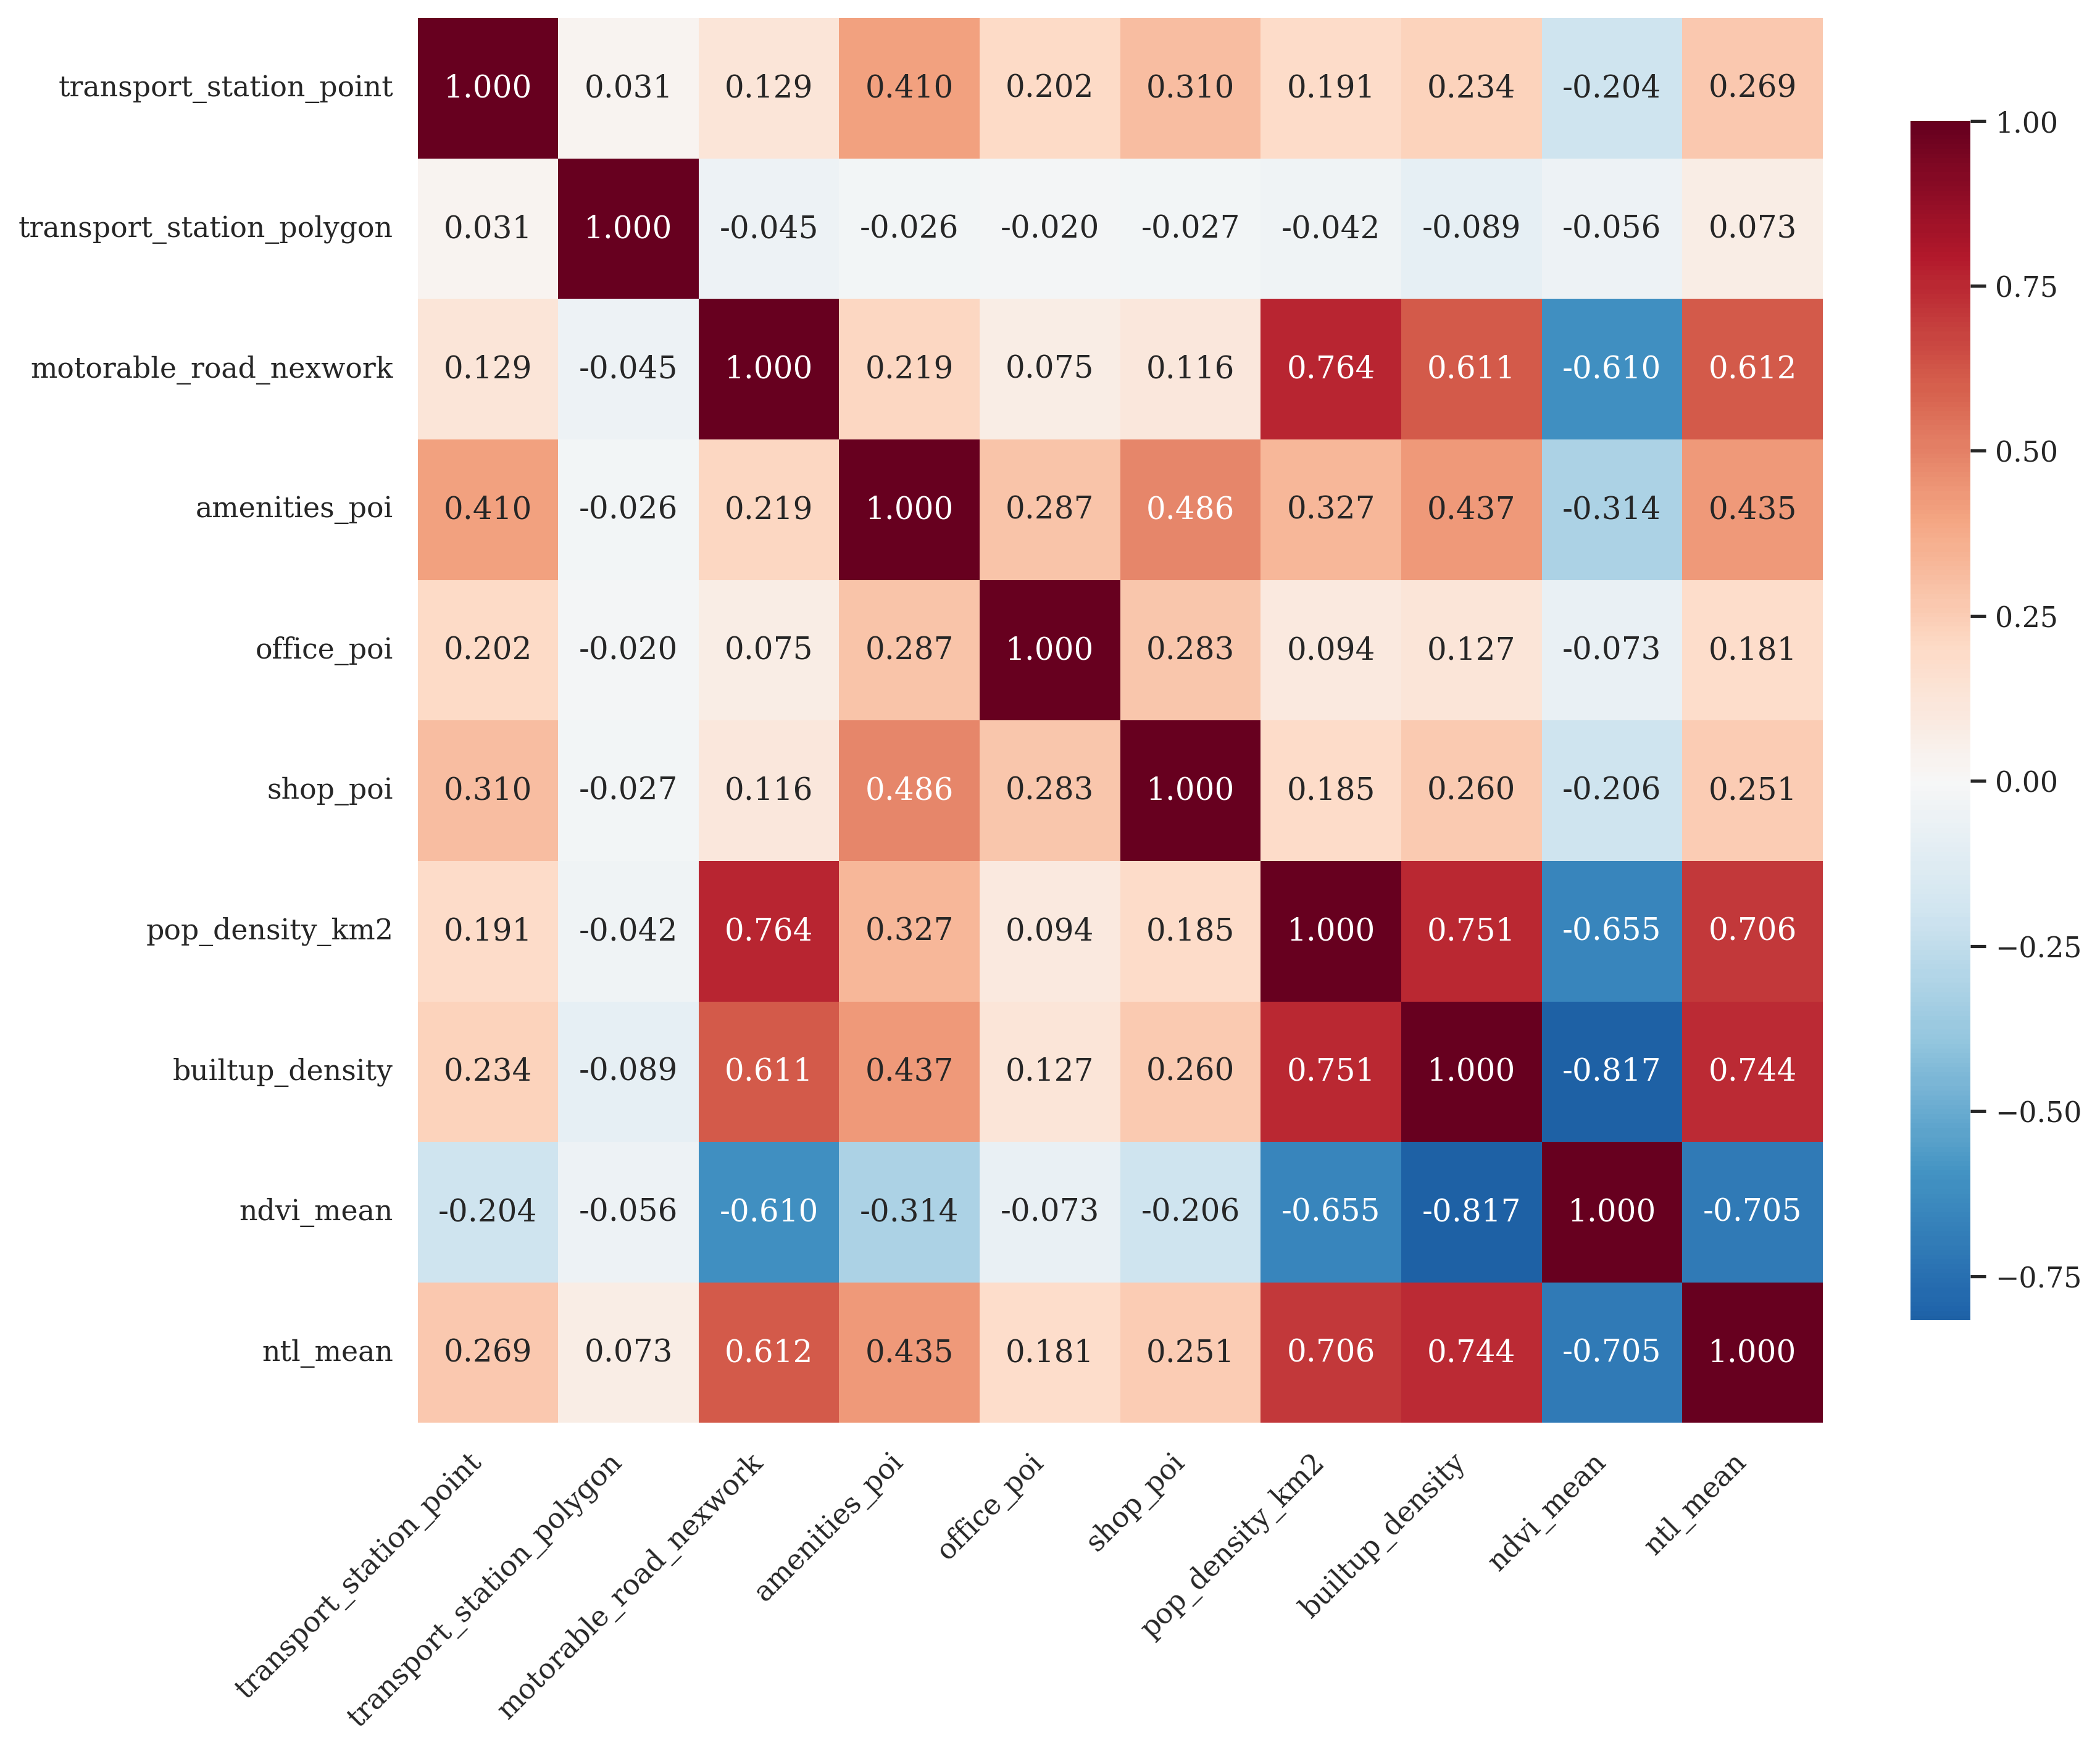

In [67]:
# Create a heatmap visualization code to show full correlation matrix
print("\n" + "="*60)
print("CORRELATION HEATMAP VISUALIZATION")
print("="*60)

print("Creating correlation heatmap...")

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create heatmap with annotations (removed the mask)
heatmap = sns.heatmap(correlation_matrix,
                     annot=True,
                     cmap='RdBu_r',
                     center=0,
                     square=True,
                     fmt='.3f',
                     cbar_kws={"shrink": .8})

# plt.title('Pearson Correlation Matrix of Economic Indicators\n(After Log Transformation)',
#           fontsize=14, fontweight='bold')
# plt.xlabel('Variables', fontsize=12)
# plt.ylabel('Variables', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("image/process/correlation_heatmap_full_log_data.png", dpi=300)
plt.show()

In [65]:
import matplotlib.font_manager as fm
available_fonts = [f.name for f in fm.fontManager.ttflist]
print('Liberation Sans' in available_fonts)

True


In [59]:
import matplotlib.pyplot as plt
print(plt.rcParams['font.sans-serif'])
print(plt.rcParams['font.family'])

['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
['serif']


Mainly it is that ndvi is negatively correlated with all other variables, and the rest are positively correlated with each other.
And the transport station polygan should be positively correlated other variables,especially with built-up areas and road network, but it is not, as during the osm data processing, the polygon is counted by area and the data amount is very small, so it is not correlated with other variables. Or maybe is the porblem of airport data, as it is not the same scale as other variables?

In [23]:
# Summary of correlation findings
print("\nCorrelation Analysis Summary:")
print("1. The correlation matrix shows the linear relationships between variables after log transformation")
print("2. High correlations (|r| > 0.7) may indicate redundancy and could influence PCA results")
print("3. Moderate correlations (0.5 < |r| < 0.7) suggest related but distinct aspects of economic potential")
print("4. Low correlations (|r| < 0.5) indicate relatively independent variables")

# Reset pandas display options
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


Correlation Analysis Summary:
1. The correlation matrix shows the linear relationships between variables after log transformation
2. High correlations (|r| > 0.7) may indicate redundancy and could influence PCA results
3. Moderate correlations (0.5 < |r| < 0.7) suggest related but distinct aspects of economic potential
4. Low correlations (|r| < 0.5) indicate relatively independent variables


# 3 Data Preprocessing - Z-Score Standardization

In [24]:

X = processed_df.values  # Convert to numpy array
# Create list of variable names for later use
list_var_X = processed_df.columns.tolist()

print(f"Data matrix X shape: {X.shape}")
print(f"Variable names: {list_var_X}")



Data matrix X shape: (1799, 10)
Variable names: ['transport_station_point', 'transport_station_polygon', 'motorable_road_nexwork', 'amenities_poi', 'office_poi', 'shop_poi', 'pop_density_km2', 'builtup_density', 'ndvi_mean', 'ntl_mean']


In [25]:
# Apply standardization using StandardScaler (essential for PCA)
# Method for standardisation - z score
X_standardized = StandardScaler().fit_transform(X)

print("Standardization completed using StandardScaler().fit_transform()")
print("Mean of standardized variables (should be ~0):")
print(np.mean(X_standardized, axis=0).round(6))
print("\nStandard deviation of standardized variables (should be ~1):")
print(np.std(X_standardized, axis=0).round(6))

Standardization completed using StandardScaler().fit_transform()
Mean of standardized variables (should be ~0):
[ 0. -0. -0. -0.  0. -0.  0. -0. -0.  0.]

Standard deviation of standardized variables (should be ~1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# 4 PCA Analysis

In [26]:
print("\nStep 4: Performing Principal Component Analysis...")

# Initialize PCA with random state for reproducibility (following teacher's methodology)
pca = PCA(random_state=rand_st_int)


Step 4: Performing Principal Component Analysis...


In [27]:
# Fit the components and transform the data
X_new_components = pca.fit_transform(X_standardized)

print("PCA analysis completed.")
print(f"Shape of transformed data: {X_new_components.shape}")

# Create DataFrame for Principal Components (following teacher's approach)
# pca here is an object so we have to make a df to check
df_PrincipleComp = pd.DataFrame(pca.components_, columns=list_var_X)

df_PrincipleComp

PCA analysis completed.
Shape of transformed data: (1799, 10)


,transport_station_point,transport_station_polygon,motorable_road_nexwork,amenities_poi,office_poi,shop_poi,pop_density_km2,builtup_density,ndvi_mean,ntl_mean
0,0.1911,-0.0087,0.3672,0.2826,0.1234,0.1993,0.4112,0.4319,-0.4037,0.4186
1,0.4226,-0.0063,-0.2804,0.4341,0.4420,0.5018,-0.2201,-0.1258,0.1914,-0.0787
2,0.1393,0.9679,-0.0658,-0.0178,-0.0736,-0.0510,-0.0539,-0.0781,-0.0935,0.1155
3,-0.4733,0.1259,0.1159,-0.1822,0.8344,-0.1011,0.0457,-0.0358,0.0224,0.0559
4,0.6925,-0.1052,0.1097,-0.1906,0.2695,-0.6141,0.0493,-0.0668,0.0651,0.0103
5,-0.2061,-0.0458,-0.4654,0.5468,0.0259,-0.5249,-0.2144,0.2479,-0.1660,0.1694
6,-0.1361,0.0882,0.4293,0.5518,-0.0928,-0.1947,0.2816,-0.2938,0.5210,-0.0361
7,-0.0081,-0.0829,-0.3002,-0.2124,-0.0654,0.0698,0.1246,-0.1237,0.4172,0.8024
8,0.0189,0.1006,-0.4535,-0.0749,0.0369,-0.0000,0.6834,0.3463,0.2486,-0.3579
9,0.0203,0.0961,0.2452,-0.0871,-0.0142,0.0141,-0.4089,0.7091,0.5020,-0.0118


## 4.1: EXPLAINED VARIANCE AND EIGENVALUES

In [28]:
print("\n" + "="*60)
print("EXPLAINED VARIANCE AND EIGENVALUE ANALYSIS")
print("="*60)

# Print explained variance ratio and eigenvalues (following teacher's format)
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

print('\nExplained variance ratio (percentage format):')
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio*100:.2f}%")

print('\nEigenvalues of each component:')
print(pca.explained_variance_)

# Create cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print('\nCumulative explained variance:')
for i, cum_var in enumerate(cumulative_variance):
    print(f"PC1-PC{i+1}: {cum_var*100:.2f}%")


EXPLAINED VARIANCE AND EIGENVALUE ANALYSIS
Explained variance ratio of each component:
[0.42656825 0.16023654 0.10345022 0.08058642 0.0682204  0.05090306
 0.04543381 0.02815373 0.0233471  0.01310047]

Explained variance ratio (percentage format):
PC1: 42.66%
PC2: 16.02%
PC3: 10.35%
PC4: 8.06%
PC5: 6.82%
PC6: 5.09%
PC7: 4.54%
PC8: 2.82%
PC9: 2.33%
PC10: 1.31%

Eigenvalues of each component:
[4.26805491 1.60325655 1.03507752 0.80631243 0.68258344 0.50931373
 0.45459082 0.28169393 0.23360086 0.13107753]

Cumulative explained variance:
PC1-PC1: 42.66%
PC1-PC2: 58.68%
PC1-PC3: 69.03%
PC1-PC4: 77.08%
PC1-PC5: 83.91%
PC1-PC6: 89.00%
PC1-PC7: 93.54%
PC1-PC8: 96.36%
PC1-PC9: 98.69%
PC1-PC10: 100.00%


## 4.2: EIGENVALUE SCREE PLOT


Creating eigenvalue scree plot...


<Figure size 3000x1800 with 0 Axes>

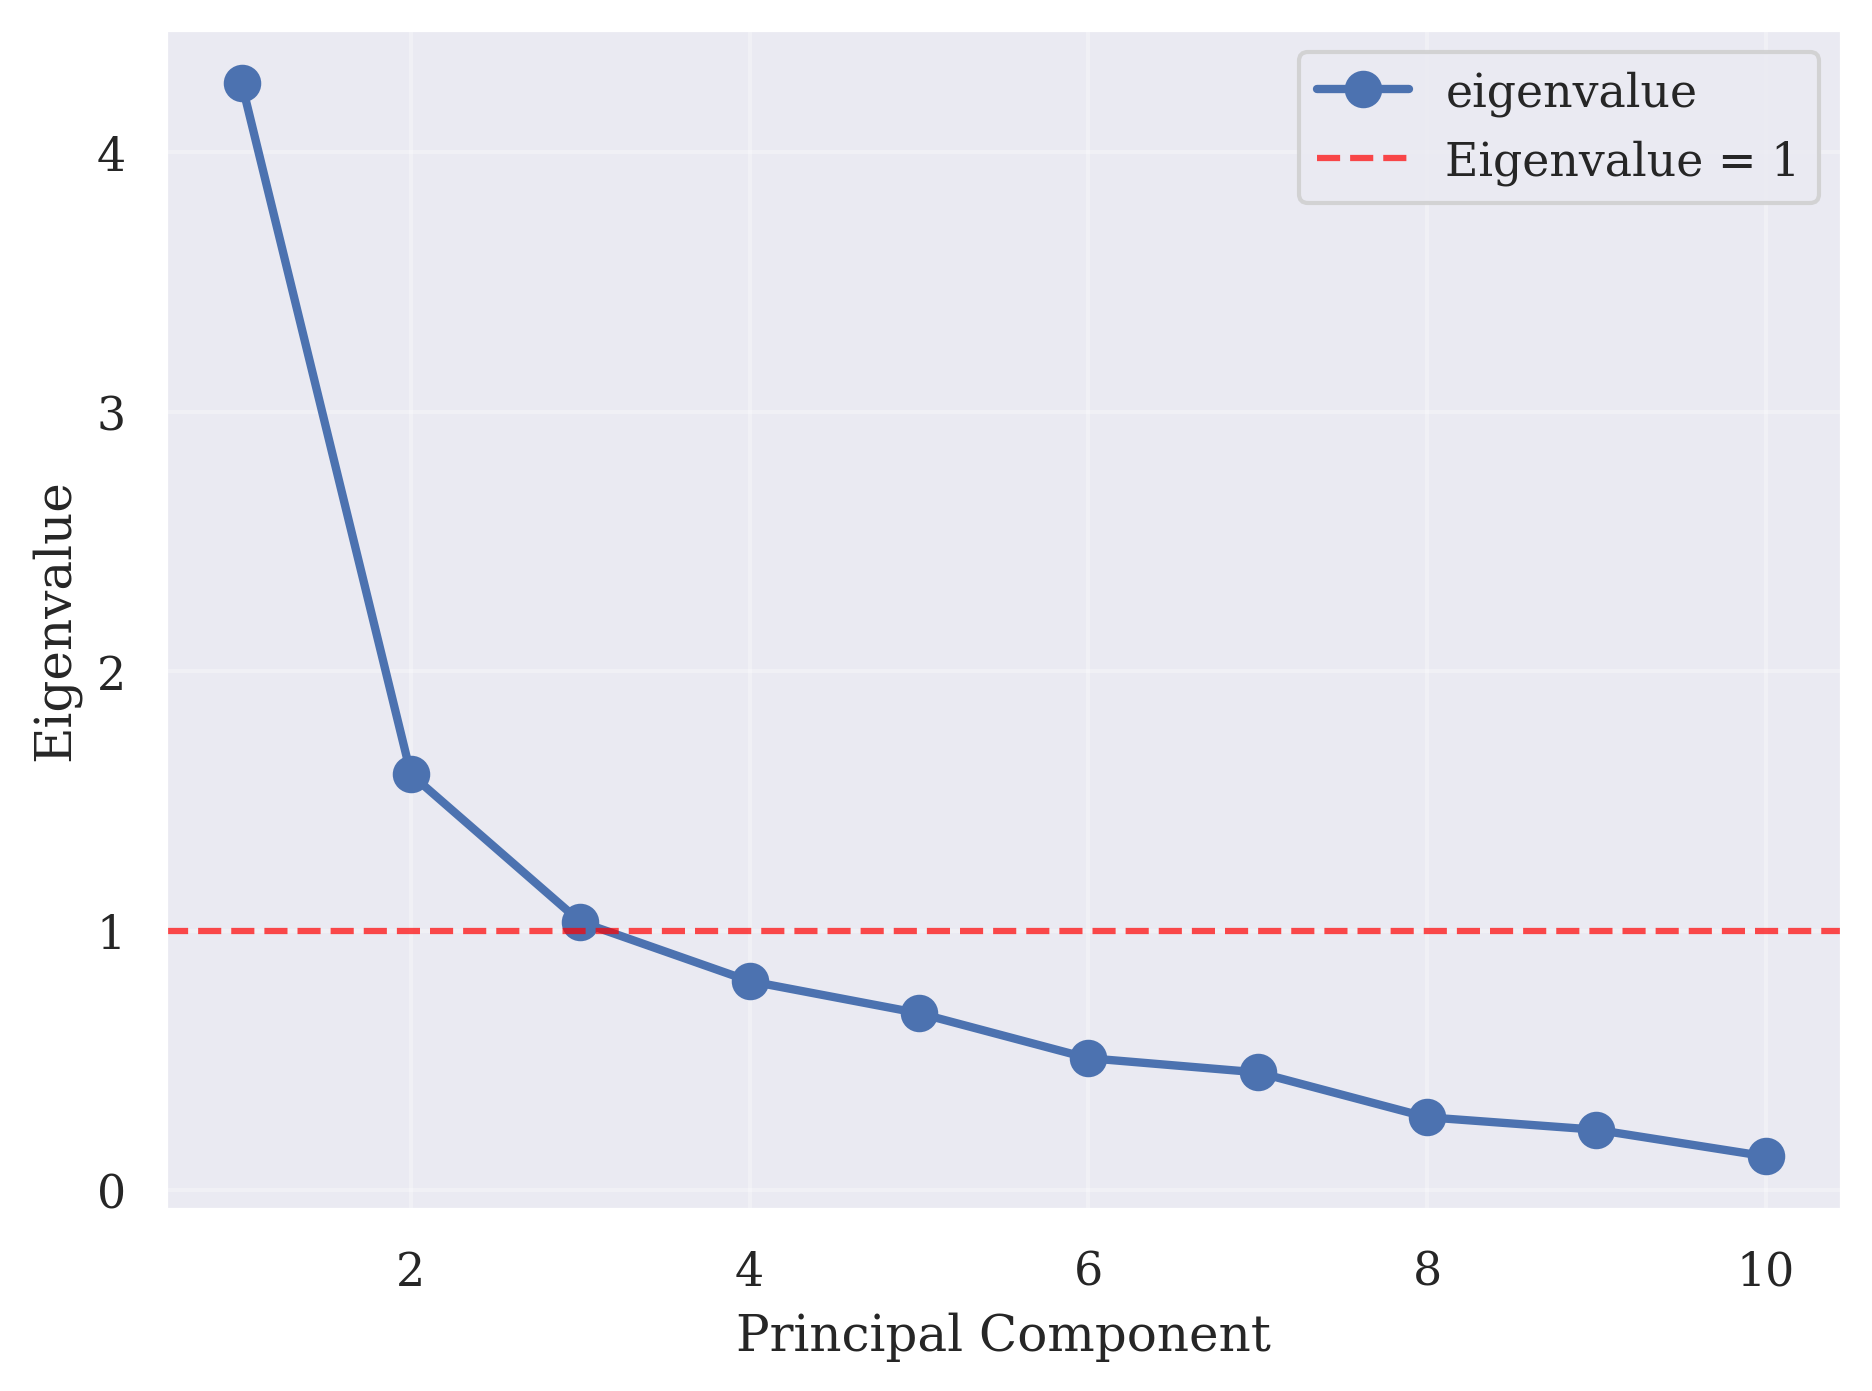


Number of components with eigenvalue > 1 (Kaiser criterion): 3


In [68]:
print("\nCreating eigenvalue scree plot...")

# Create eigenvalue DataFrame and plot (following teacher's methodology)
df_eigenvalue = pd.DataFrame({'eigenvalue': pca.explained_variance_,
                             'PC': list(range(1, pca.n_components_ + 1))})

# Create the scree plot
plt.figure(figsize=(10, 6))
df_eigenvalue.plot.line(x='PC', y='eigenvalue', marker='o', linewidth=2, markersize=8)
# plt.title('Scree Plot: Eigenvalues by Principal Component', fontsize=14, fontweight='bold')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Eigenvalue', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Eigenvalue = 1')
plt.legend()
plt.tight_layout()
plt.savefig("image/process/scree_plot_eigenvalues.png", dpi=300)
plt.show()

# Print components with eigenvalue > 1 (Kaiser criterion)
components_above_one = sum(pca.explained_variance_ > 1)
print(f"\nNumber of components with eigenvalue > 1 (Kaiser criterion): {components_above_one}")

## 4.3: BIPLOT VISUALIZATION

In [30]:

# =============================================================================

print("\n" + "="*60)
print("BIPLOT VISUALIZATION")
print("="*60)

# # Install bioinfokit if not available
# if 'bioinfokit' not in sys.modules:
#     print("Installing bioinfokit for biplot visualization...")
#     # Note: In practice, you would run: !pip3 install bioinfokit
#     print("Please install bioinfokit using: pip3 install bioinfokit")
#     print("Then uncomment the biplot code below to generate the visualization")

# Biplot code (to be uncommented after installing bioinfokit)
print("Biplot code (install bioinfokit first):")

from bioinfokit.visuz import cluster

cluster.biplot(cscore=X_new_components, loadings=pca.components_,
                labels=df_PrincipleComp.columns.values,
                var1=round(pca.explained_variance_ratio_[0]*100, 2),
                var2=round(pca.explained_variance_ratio_[1]*100, 2))



BIPLOT VISUALIZATION
Biplot code (install bioinfokit first):


In [31]:
from adjustText import adjust_text
import matplotlib.pyplot as plt

def pca_biplot(pca,
               X_transformed,
               feature_names,
               arrow_scale=0.5,
               scatter_kwargs=None,
               arrow_kwargs=None,
               text_kwargs=None,
               xlim=None,
               ylim=None,
               figsize=(8, 6),
               ):

    # 1) 提取 scores/loadings/explained
    scores   = X_transformed
    loadings = pca.components_.T
    explained = pca.explained_variance_ratio_

    # 2) 合并默认样式
    scat_def = {'s': 15, 'alpha': 0.4, 'color': 'dimgray'}
    arr_def  = {'color': 'crimson',
                'width': 0.005,
                'head_width': 0.03,
                'length_includes_head': True,
                'linewidth': 1.2}
    txt_def  = {'fontsize': 8, 'color': 'darkgreen'}

    scatter_kwargs = {**scat_def, **(scatter_kwargs or {})}
    arrow_kwargs   = {**arr_def,  **(arrow_kwargs   or {})}
    text_kwargs    = {**txt_def,  **(text_kwargs    or {})}

    # 3) 缩放因子
    scale_x = scores[:,0].ptp()
    scale_y = scores[:,1].ptp()

    # 4) 画散点
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(scores[:,0], scores[:,1], **scatter_kwargs)

    # 5) 画箭头 + 收集文本
    texts = []
    for i, name in enumerate(feature_names):
        x_l = loadings[i,0] * scale_x * arrow_scale
        y_l = loadings[i,1] * scale_y * arrow_scale

        ax.arrow(0, 0, x_l, y_l, **arrow_kwargs)
        txt = ax.text(
            x_l * 1.1, y_l * 1.1,
            name,
            ha='center', va='center',
            **text_kwargs
        )
        texts.append(txt)

    # ← 在这儿调用 adjust_text
    adjust_text(
        texts,
        ax=ax,
        arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),
        expand_text=(1.1, 1.2),
        expand_points=(1.2, 1.2)
    )

    # 6) 辅助线 & 标注
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)
    ax.set_xlabel(f'PC1 ({explained[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({explained[1]*100:.2f}%)')
    # ax.set_title(title)
    ax.grid(True, linestyle='--', alpha=0.3)

    # 7) 可选锁定范围
    if xlim is not None:  ax.set_xlim(xlim)
    if ylim is not None:  ax.set_ylim(ylim)

    plt.tight_layout()
    return fig, ax


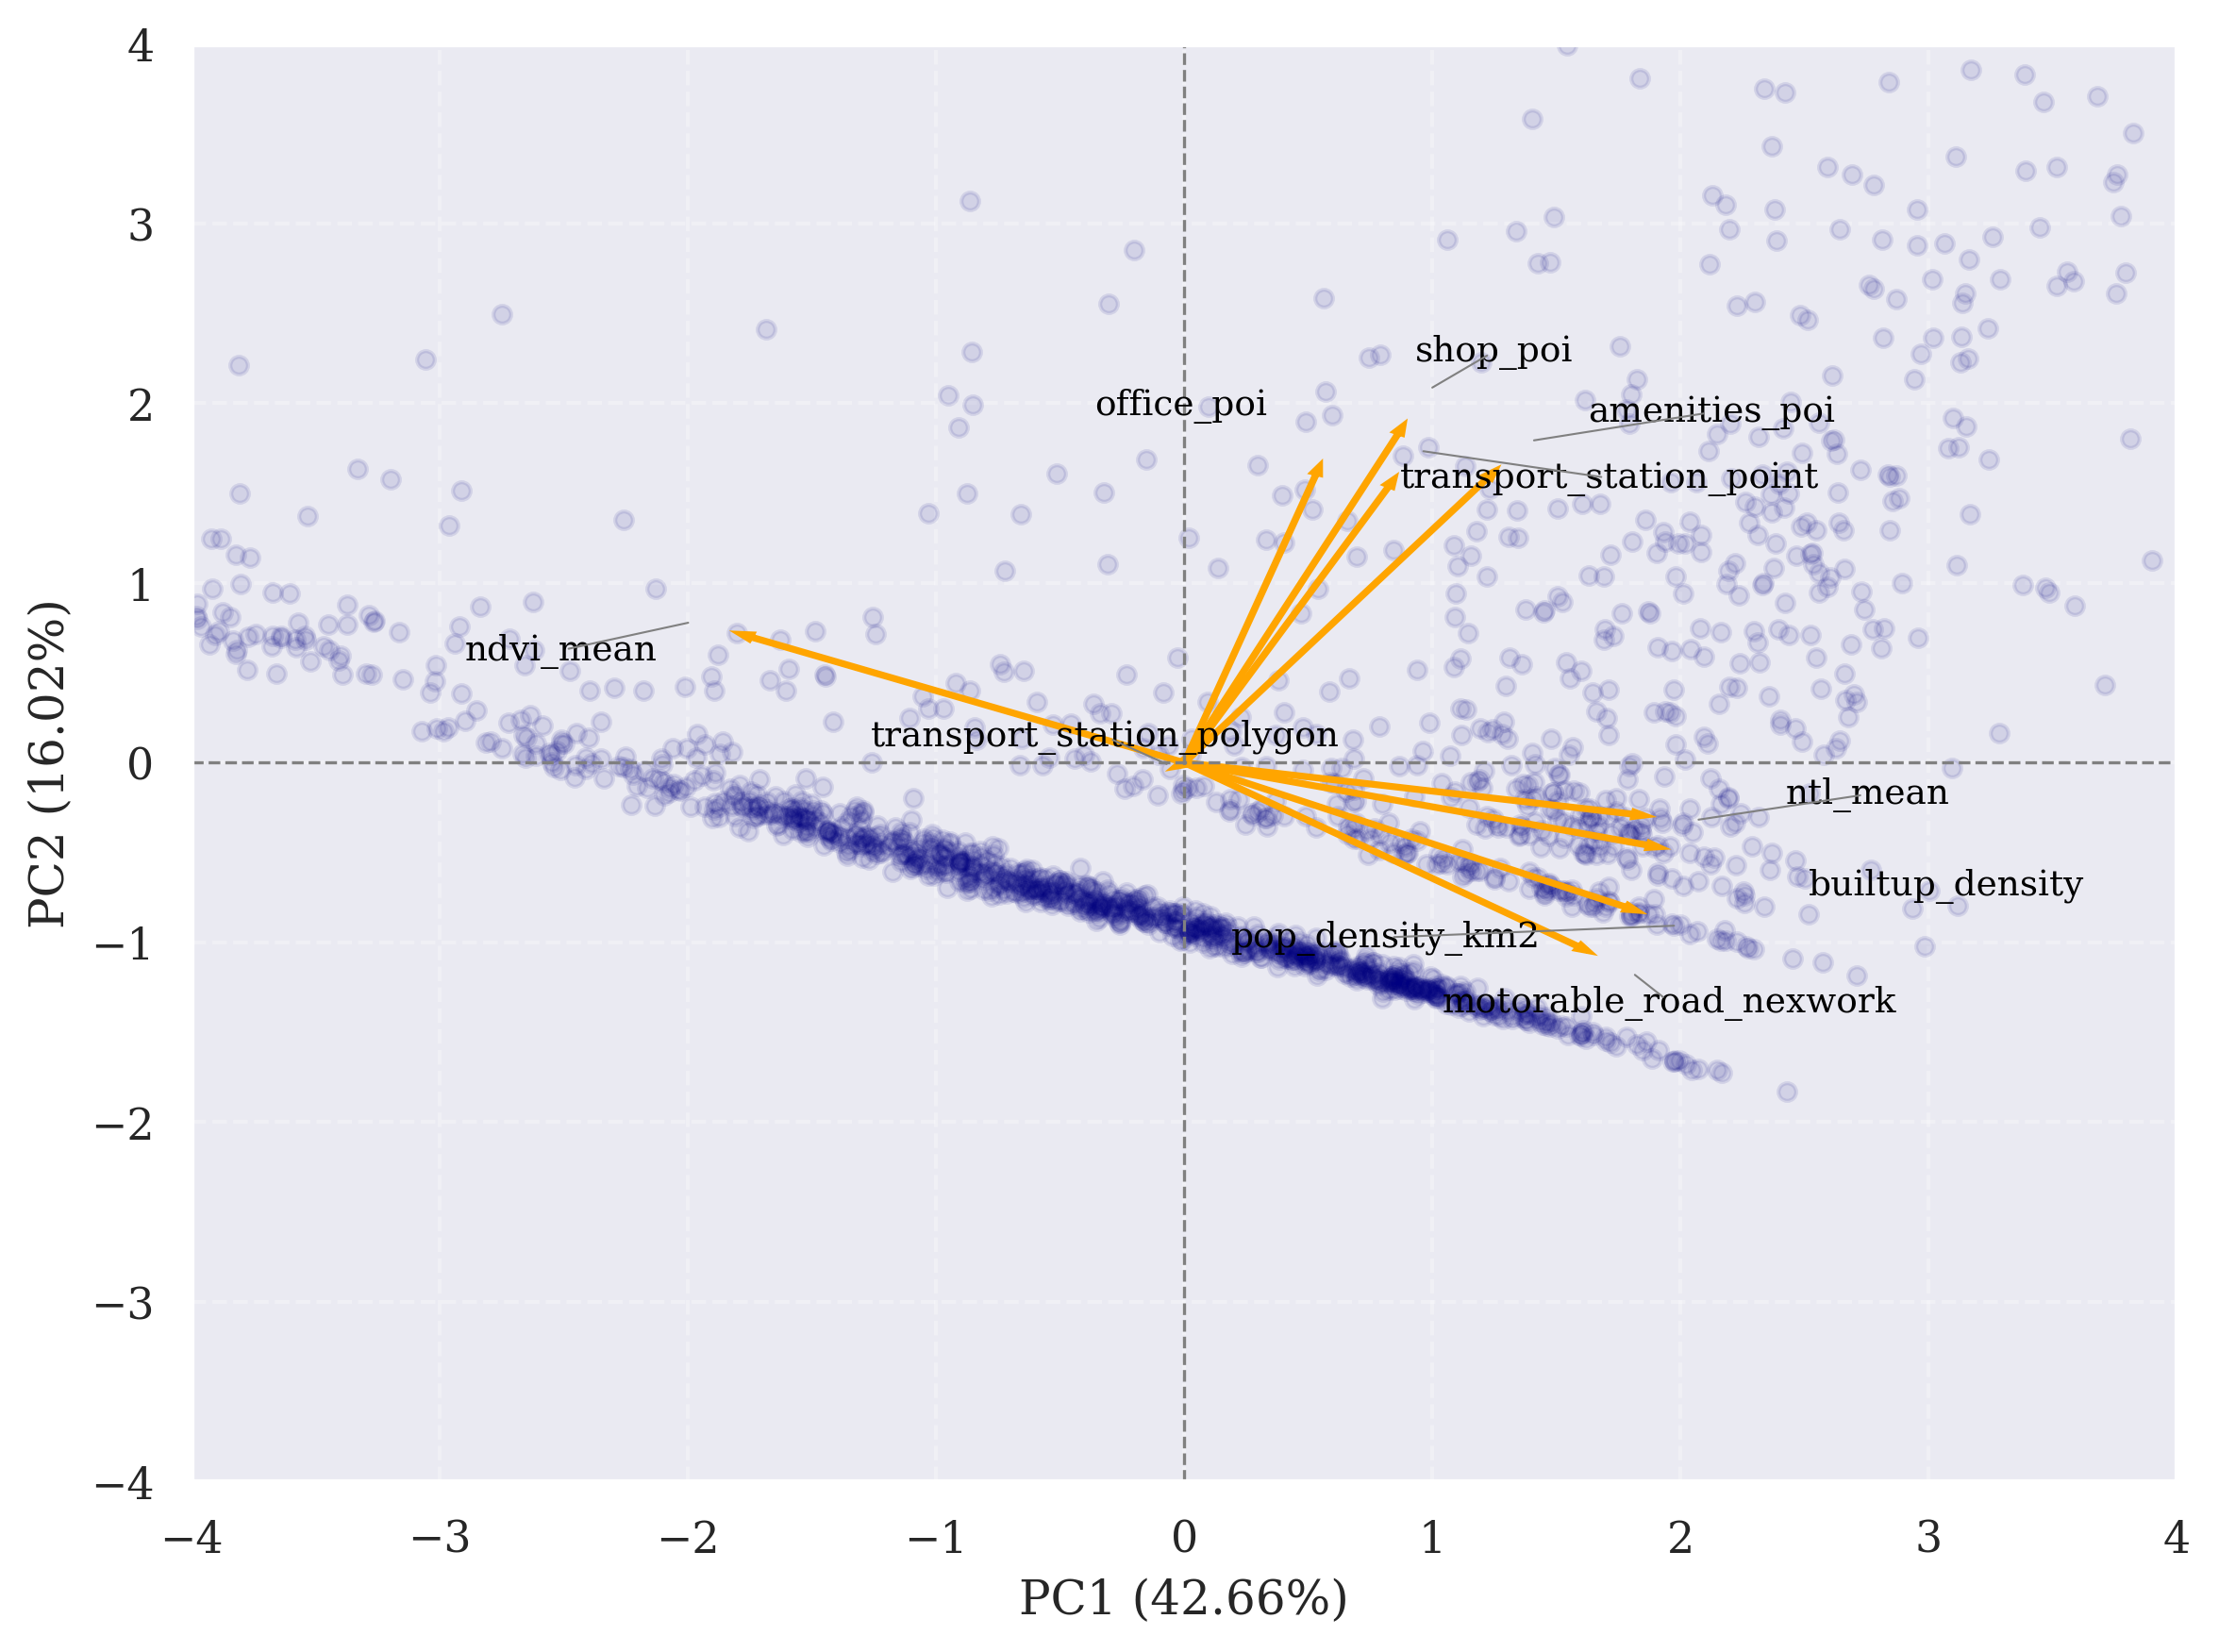

In [69]:
fig, ax = pca_biplot(
    pca,
    X_new_components,
    list_var_X,
    arrow_scale=0.4,
    scatter_kwargs={'s':20,'alpha':0.1,'color':'navy'},
    arrow_kwargs={'color':'orange','linewidth':1.5},
    text_kwargs={'fontsize':9,'color':'black'},
    xlim=(-4,4),
    ylim=(-4,4),

)
plt.savefig("image/process/pca_biplot.png", dpi=300)
plt.show()

## 4.4: DETAILED COMPONENT LOADINGS ANALYSIS

In [33]:
print("\n" + "="*60)
print("DETAILED COMPONENT LOADINGS ANALYSIS")
print("="*60)

# Create loadings DataFrame for better display (first 3 components)
n_components_to_show = min(3, len(pca.explained_variance_ratio_))
loadings_display = pd.DataFrame(
    pca.components_[:n_components_to_show].T,
    columns=[f'PC{i+1}' for i in range(n_components_to_show)],
    index=list_var_X
)

print("Loadings for the first 3 Principal Components:")
print(loadings_display.round(4))


DETAILED COMPONENT LOADINGS ANALYSIS
Loadings for the first 3 Principal Components:
                                                               PC1  \
transport_station_point                                     0.1911   
transport_station_polygon                                  -0.0087   
motorable_road_nexwork                                      0.3672   
amenities_poi                                               0.2826   
office_poi                                                  0.1234   
shop_poi                                                    0.1993   
pop_density_km2                                             0.4112   
builtup_density                                             0.4319   
ndvi_mean                                                  -0.4037   
ntl_mean                                                    0.4186   

                                                               PC2  \
transport_station_point                                     0.4226   
tran

## 4.5: FIRST PRINCIPAL COMPONENT (PC1) DETAILED ANALYSIS

In [35]:
print("\n" + "="*60)
print("FIRST PRINCIPAL COMPONENT (PC1) DETAILED ANALYSIS")
print("="*60)

# Extract PC1 loadings
pc1_loadings = pd.DataFrame({
    'Variable': list_var_X,
    'PC1_Loading': pca.components_[0]
})

# Sort by loading values (most positive to most negative)
pc1_loadings_sorted = pc1_loadings.sort_values('PC1_Loading', ascending=False)

print("PC1 Loadings (sorted from highest positive to most negative):")
print(pc1_loadings_sorted.round(4))

print(f"\nPC1 explains {pca.explained_variance_ratio_[0]*100:.2f}% of total variance")
print(f"PC1 eigenvalue: {pca.explained_variance_[0]:.4f}")

# Identify variables with strongest positive and negative loadings
print("\nVariables with STRONGEST POSITIVE influence on PC1:")
top_positive = pc1_loadings_sorted.head(3)
for _, row in top_positive.iterrows():
    print(f"  {row['Variable']}: {row['PC1_Loading']:.4f}")

print("\nVariables with STRONGEST NEGATIVE influence on PC1:")
top_negative = pc1_loadings_sorted.tail(3)
for _, row in top_negative.iterrows():
    print(f"  {row['Variable']}: {row['PC1_Loading']:.4f}")


FIRST PRINCIPAL COMPONENT (PC1) DETAILED ANALYSIS
PC1 Loadings (sorted from highest positive to most negative):
                    Variable                              PC1_Loading
7            builtup_density                                   0.4319
9                   ntl_mean                                   0.4186
6            pop_density_km2                                   0.4112
2     motorable_road_nexwork                                   0.3672
3              amenities_poi                                   0.2826
5                   shop_poi                                   0.1993
0    transport_station_point                                   0.1911
4                 office_poi                                   0.1234
1  transport_station_polygon                                  -0.0087
8                  ndvi_mean                                  -0.4037

PC1 explains 42.66% of total variance
PC1 eigenvalue: 4.2681

Variables with STRONGEST POSITIVE influence on PC1:
  

In [36]:
pc1_loadings_sorted.to_csv("analysis/02_02 pac_pc1/pc1_loadings_analysis.csv", index=False)

In [37]:
## 4.5.1: SECOND PRINCIPAL COMPONENT (PC2) DETAILED ANALYSIS

print("\n" + "=" * 60)
print("SECOND PRINCIPAL COMPONENT (PC2) DETAILED ANALYSIS")
print("=" * 60)

# Extract PC2 loadings
pc2_loadings = pd.DataFrame({
    'Variable': list_var_X,
    'PC2_Loading': pca.components_[1]
})

# Sort by loading values (most positive to most negative)
pc2_loadings_sorted = pc2_loadings.sort_values('PC2_Loading', ascending=False)

print("PC2 Loadings (sorted from highest positive to most negative):")
print(pc2_loadings_sorted.round(4))

print(f"\nPC2 explains {pca.explained_variance_ratio_[1] * 100:.2f}% of total variance")
print(f"PC2 eigenvalue: {pca.explained_variance_[1]:.4f}")

# Identify variables with strongest positive and negative loadings
print("\nVariables with STRONGEST POSITIVE influence on PC2:")
top_positive_pc2 = pc2_loadings_sorted.head(3)
for _, row in top_positive_pc2.iterrows():
    print(f"  {row['Variable']}: {row['PC2_Loading']:.4f}")

print("\nVariables with STRONGEST NEGATIVE influence on PC2:")
top_negative_pc2 = pc2_loadings_sorted.tail(3)
for _, row in top_negative_pc2.iterrows():
    print(f"  {row['Variable']}: {row['PC2_Loading']:.4f}")

# Save PC2 analysis
pc2_loadings_sorted.to_csv("analysis/02_02 pac_pc1/pc2_loadings_analysis.csv", index=False)


SECOND PRINCIPAL COMPONENT (PC2) DETAILED ANALYSIS
PC2 Loadings (sorted from highest positive to most negative):
                    Variable                              PC2_Loading
5                   shop_poi                                   0.5018
4                 office_poi                                   0.4420
3              amenities_poi                                   0.4341
0    transport_station_point                                   0.4226
8                  ndvi_mean                                   0.1914
1  transport_station_polygon                                  -0.0063
9                   ntl_mean                                  -0.0787
7            builtup_density                                  -0.1258
6            pop_density_km2                                  -0.2201
2     motorable_road_nexwork                                  -0.2804

PC2 explains 16.02% of total variance
PC2 eigenvalue: 1.6033

Variables with STRONGEST POSITIVE influence on PC2:
 

## 4.6: ECONOMIC POTENTIAL INDEX (EPI) CONSTRUCTION USING PC1

In [38]:
print("\n" + "="*60)
print("ECONOMIC POTENTIAL INDEX (EPI) CONSTRUCTION")
print("="*60)

print("Based on PCA analysis results, constructing Economic Potential Index using PC1 only...")
print("Formula: EPI = Z-score standardized PC1 scores")
print("Where PC1 = (Z_var1 * Loading_1) + (Z_var2 * Loading_2) + ... + (Z_var10 * Loading_10)")


ECONOMIC POTENTIAL INDEX (EPI) CONSTRUCTION
Based on PCA analysis results, constructing Economic Potential Index using PC1 only...
Formula: EPI = Z-score standardized PC1 scores
Where PC1 = (Z_var1 * Loading_1) + (Z_var2 * Loading_2) + ... + (Z_var10 * Loading_10)


In [39]:
print("\n" + "="*60)
print("ECONOMIC POTENTIAL INDEX (EPI) CONSTRUCTION")
print("="*60)

print("Based on PCA analysis results, constructing Economic Potential Index using PC1 only...")
print("Note: Applying sign corrections for intuitive interpretation")

# Display the updated PC1 loadings from your new analysis
print(f"\nUpdated PC1 Loadings (after corrected standardization):")
pc1_loadings_corrected = {
    'builtup_density': 0.4471,
    'ntl_mean': 0.4271,
    'pop_density_km2': 0.3388,
    'motorable_road_nexwork': 0.3344,  # Note: there's a typo in the original variable name
    'amenities_poi': 0.3178,
    'shop_poi': 0.2288,
    'transport_station_point': 0.2199,
    'office_poi': 0.1408,
    'transport_station_polygon': -0.0059,
    'ndvi_mean': -0.4117
}

for var, loading in pc1_loadings_corrected.items():
    print(f"  {var}: {loading:.4f}")

# Identify variables that need sign reversal for intuitive interpretation
variables_to_reverse = ['transport_station_polygon', 'ndvi_mean']
print(f"\nVariables requiring sign reversal for intuitive interpretation:")
for var in variables_to_reverse:
    original_loading = pc1_loadings_corrected[var]
    print(f"  {var}: {original_loading:.4f} → {-original_loading:.4f}")

print(f"\nRationale for sign reversal:")
print("- transport_station_polygon: More transport infrastructure should increase economic potential")
print("- ndvi_mean: Higher vegetation (environmental quality) should contribute positively to economic potential")

# Step 1: Extract PC1 scores for all hexagons (original calculation)
pc1_scores_original = X_new_components[:, 0]

# Step 2: Apply sign corrections for intuitive index interpretation
print(f"\nStep 1: Calculating corrected EPI scores...")

# Get the PC1 loadings from the PCA object
pc1_loadings_array = pca.components_[0]

# Create a corrected loadings array
pc1_loadings_corrected_array = pc1_loadings_array.copy()

# Find indices of variables to reverse (assuming the order matches list_var_X)
variables_to_reverse_indices = []
for var in variables_to_reverse:
    if var in list_var_X:
        idx = list_var_X.index(var)
        variables_to_reverse_indices.append(idx)
        print(f"Found {var} at index {idx}")
    elif 'motorable_road_nexwork' in list_var_X and var == 'motorable_road_network':
        # Handle potential typo in variable name
        idx = list_var_X.index('motorable_road_nexwork')
        print(f"Note: Using 'motorable_road_nexwork' from data (possible typo)")

# Apply sign reversal to specific loadings
for idx in variables_to_reverse_indices:
    original_loading = pc1_loadings_corrected_array[idx]
    pc1_loadings_corrected_array[idx] = -original_loading
    print(f"Reversed loading for index {idx}: {original_loading:.4f} → {-original_loading:.4f}")

# Recalculate PC1 scores with corrected loadings
# Formula: Corrected PC1 = X_standardized @ corrected_loadings
pc1_scores_corrected = X_standardized @ pc1_loadings_corrected_array

print(f"\nOriginal PC1 score range: {pc1_scores_original.min():.4f} to {pc1_scores_original.max():.4f}")
print(f"Corrected PC1 score range: {pc1_scores_corrected.min():.4f} to {pc1_scores_corrected.max():.4f}")




ECONOMIC POTENTIAL INDEX (EPI) CONSTRUCTION
Based on PCA analysis results, constructing Economic Potential Index using PC1 only...
Note: Applying sign corrections for intuitive interpretation

Updated PC1 Loadings (after corrected standardization):
  builtup_density: 0.4471
  ntl_mean: 0.4271
  pop_density_km2: 0.3388
  motorable_road_nexwork: 0.3344
  amenities_poi: 0.3178
  shop_poi: 0.2288
  transport_station_point: 0.2199
  office_poi: 0.1408
  transport_station_polygon: -0.0059
  ndvi_mean: -0.4117

Variables requiring sign reversal for intuitive interpretation:
  transport_station_polygon: -0.0059 → 0.0059
  ndvi_mean: -0.4117 → 0.4117

Rationale for sign reversal:
- transport_station_polygon: More transport infrastructure should increase economic potential
- ndvi_mean: Higher vegetation (environmental quality) should contribute positively to economic potential

Step 1: Calculating corrected EPI scores...
Found transport_station_polygon at index 1
Found ndvi_mean at index 8
Reve

In [40]:
# Step 3: Z-score standardization of both original and corrected PC1 scores
print(f"\nStep 2: Creating both Original EPI (EPI_o) and Corrected EPI...")

# Original EPI: Z-score standardization of original PC1 scores
pc1_original_mean = np.mean(pc1_scores_original)
pc1_original_std = np.std(pc1_scores_original)
epi_original = (pc1_scores_original - pc1_original_mean) / pc1_original_std

# Corrected EPI: Z-score standardization of corrected PC1 scores
pc1_corrected_mean = np.mean(pc1_scores_corrected)
pc1_corrected_std = np.std(pc1_scores_corrected)
epi_corrected = (pc1_scores_corrected - pc1_corrected_mean) / pc1_corrected_std

print(f"Original PC1 mean: {pc1_original_mean:.4f}, std: {pc1_original_std:.4f}")
print(f"EPI_o (original standardized) mean: {np.mean(epi_original):.6f}, std: {np.std(epi_original):.6f}")
print(f"EPI_o range: {epi_original.min():.4f} to {epi_original.max():.4f}")

print(f"\nCorrected PC1 mean: {pc1_corrected_mean:.4f}, std: {pc1_corrected_std:.4f}")
print(f"EPI (corrected standardized) mean: {np.mean(epi_corrected):.6f}, std: {np.std(epi_corrected):.6f}")
print(f"EPI range: {epi_corrected.min():.4f} to {epi_corrected.max():.4f}")

# Display the final corrected formula
print(f"\nFinal EPI Formulas:")
print(f"EPI_o (Original) = Z-score(PC1_original)")
print(f"EPI (Corrected) = Z-score(PC1_corrected)")

corrected_formula_parts = []
for i, var in enumerate(list_var_X):
    loading = pc1_loadings_corrected_array[i]
    corrected_formula_parts.append(f"({loading:.4f} * Z_{var})")
    print(f"  {var}: {loading:.4f}")

print(f"\nCorrected PC1 Formula:")
print(f"PC1_corrected = {' + '.join(corrected_formula_parts[:5])}")
print(f"              + {' + '.join(corrected_formula_parts[5:])}")




Step 2: Creating both Original EPI (EPI_o) and Corrected EPI...
Original PC1 mean: 0.0000, std: 2.0654
EPI_o (original standardized) mean: 0.000000, std: 1.000000
EPI_o range: -2.6501 to 2.7153

Corrected PC1 mean: -0.0000, std: 1.4610
EPI (corrected standardized) mean: 0.000000, std: 1.000000
EPI range: -3.2422 to 2.9134

Final EPI Formulas:
EPI_o (Original) = Z-score(PC1_original)
EPI (Corrected) = Z-score(PC1_corrected)
  transport_station_point: 0.1911
  transport_station_polygon: 0.0087
  motorable_road_nexwork: 0.3672
  amenities_poi: 0.2826
  office_poi: 0.1234
  shop_poi: 0.1993
  pop_density_km2: 0.4112
  builtup_density: 0.4319
  ndvi_mean: 0.4037
  ntl_mean: 0.4186

Corrected PC1 Formula:
PC1_corrected = (0.1911 * Z_transport_station_point) + (0.0087 * Z_transport_station_polygon) + (0.3672 * Z_motorable_road_nexwork) + (0.2826 * Z_amenities_poi) + (0.1234 * Z_office_poi)
              + (0.1993 * Z_shop_poi) + (0.4112 * Z_pop_density_km2) + (0.4319 * Z_builtup_density) + (

In [41]:
# Step 4: Create comprehensive results DataFrame with both EPI versions and PC2
print(f"\nStep 3: Creating results DataFrame with both EPI versions and PC2...")

# Extract PC2 scores
pc2_scores = X_new_components[:, 1]  # Add this line to get PC2 scores

epi_results_df = pd.DataFrame({
    'hex_id': spatial_ids,
    'PC1_Score_Original': pc1_scores_original,
    'PC1_Score_Corrected': pc1_scores_corrected,
    'PC2_Score': pc2_scores,  # Add PC2 scores here
    'EPI_o': epi_original, # Original EPI
    'EPI': epi_corrected # Corrected EPI (main version)
})

# Add original (transformed) variables for reference
for i, col in enumerate(list_var_X):
    epi_results_df[f'{col}_transformed'] = processed_df[col].values

# Add standardized variables for reference
for i, col in enumerate(list_var_X):
    epi_results_df[f'{col}_standardized'] = X_standardized[:, i]

print(f"EPI Results DataFrame created with both versions and PC2. Shape: {epi_results_df.shape}")

# Display summary statistics comparing both EPI versions and PC2
print(f"\nComparison: Original EPI (EPI_o) vs Corrected EPI vs PC2:")
comparison_stats = epi_results_df[['PC1_Score_Original', 'PC1_Score_Corrected', 'PC2_Score', 'EPI_o', 'EPI']].describe()
print(comparison_stats.round(4))

# Check correlation between original and corrected EPI
correlation_epi = np.corrcoef(epi_original, epi_corrected)[0, 1]
print(f"\nCorrelation between EPI_o and EPI: {correlation_epi:.4f}")
print("(Shows how much the sign correction affects the final index values)")


Step 3: Creating results DataFrame with both EPI versions and PC2...
EPI Results DataFrame created with both versions and PC2. Shape: (1799, 26)

Comparison: Original EPI (EPI_o) vs Corrected EPI vs PC2:
                            PC1_Score_Original  \
count                               1,799.0000   
mean                                    0.0000   
std                                     2.0659   
min                                    -5.4734   
25%                                    -1.0709   
50%                                     0.3253   
75%                                     1.4601   
max                                     5.6081   

                           PC1_Score_Corrected  \
count                               1,799.0000   
mean                                   -0.0000   
std                                     1.4614   
min                                    -4.7368   
25%                                    -0.6774   
50%                                     0.10

## 4.7 SPATIAL ANALYSIS OF ECONOMIC POTENTIAL INDEX

In [42]:
print("\n" + "="*60)
print("SPATIAL ANALYSIS OF CORRECTED ECONOMIC POTENTIAL INDEX")
print("="*60)

# Identify top and bottom performing areas using both EPI versions
print("Top 10 hexagons with highest Original Economic Potential (EPI_o):")
top_epi_o = epi_results_df.nlargest(10, 'EPI_o')[['hex_id', 'EPI_o', 'EPI', 'PC1_Score_Original']]
print(top_epi_o.round(4))

print("\nTop 10 hexagons with highest Corrected Economic Potential (EPI):")
top_epi = epi_results_df.nlargest(10, 'EPI')[['hex_id', 'EPI', 'EPI_o', 'PC1_Score_Corrected']]
print(top_epi.round(4))

print("\nBottom 10 hexagons with lowest Corrected Economic Potential (EPI):")
bottom_epi = epi_results_df.nsmallest(10, 'EPI')[['hex_id', 'EPI', 'EPI_o', 'PC1_Score_Corrected']]
print(bottom_epi.round(4))

# Create EPI classification categories for both versions
print(f"\nCreating EPI classification categories for both versions...")

# Define EPI categories based on standard deviations (same function as before)
def classify_epi(epi_value):
    if epi_value >= 2.0:
        return "Very High (>+2σ)"
    elif epi_value >= 1.0:
        return "High (+1σ to +2σ)"
    elif epi_value >= 0.0:
        return "Above Average (0 to +1σ)"
    elif epi_value >= -1.0:
        return "Below Average (-1σ to 0)"
    elif epi_value >= -2.0:
        return "Low (-2σ to -1σ)"
    else:
        return "Very Low (<-2σ)"

# Apply classification to both EPI versions
epi_results_df['EPI_o_Category'] = epi_results_df['EPI_o'].apply(classify_epi)
epi_results_df['EPI_Category'] = epi_results_df['EPI'].apply(classify_epi)

# Display category distribution comparison
print("Original EPI (EPI_o) Category Distribution:")
category_counts_o = epi_results_df['EPI_o_Category'].value_counts()
for category, count in category_counts_o.items():
    percentage = (count / len(epi_results_df)) * 100
    print(f"  {category}: {count} hexagons ({percentage:.1f}%)")

print("\nCorrected EPI Category Distribution:")
category_counts = epi_results_df['EPI_Category'].value_counts()
for category, count in category_counts.items():
    percentage = (count / len(epi_results_df)) * 100
    print(f"  {category}: {count} hexagons ({percentage:.1f}%)")

# Analyze the impact of sign correction on rankings
print(f"\nImpact Analysis: Sign Correction Effects on Rankings")
print("Comparing rankings between EPI_o and EPI...")




SPATIAL ANALYSIS OF CORRECTED ECONOMIC POTENTIAL INDEX
Top 10 hexagons with highest Original Economic Potential (EPI_o):
      hex_id                                    EPI_o  \
1137    1790                                   2.7153   
273      710                                   2.3526   
892     1449                                   2.2911   
755     1278                                   2.2742   
1220    1908                                   2.1809   
848     1392                                   2.1408   
976     1561                                   2.1351   
891     1448                                   2.1141   
978     1563                                   2.1136   
1098    1733                                   2.0603   

                                          EPI  \
1137                                   2.9134   
273                                    2.8979   
892                                    2.5738   
755                                    2.8220   
1220 

In [43]:
# Create ranking comparison for both EPI versions
epi_results_df['EPI_o_Rank'] = epi_results_df['EPI_o'].rank(ascending=False)
epi_results_df['EPI_Rank'] = epi_results_df['EPI'].rank(ascending=False)
epi_results_df['EPI_Rank_Change'] = epi_results_df['EPI_o_Rank'] - epi_results_df['EPI_Rank']

# Show examples of hexagons with largest ranking changes between EPI versions
print("\nHexagons with largest positive ranking improvements (EPI_o → EPI):")
rank_improvements = epi_results_df.nlargest(5, 'EPI_Rank_Change')[['hex_id', 'EPI_o_Rank', 'EPI_Rank', 'EPI_Rank_Change', 'EPI_o', 'EPI']]
print(rank_improvements.round(2))

print("\nHexagons with largest ranking decreases (EPI_o → EPI):")
rank_decreases = epi_results_df.nsmallest(5, 'EPI_Rank_Change')[['hex_id', 'EPI_o_Rank', 'EPI_Rank', 'EPI_Rank_Change', 'EPI_o', 'EPI']]
print(rank_decreases.round(2))

# Summary statistics of ranking changes between EPI versions
rank_change_stats = epi_results_df['EPI_Rank_Change'].describe()
print(f"\nEPI Ranking Change Statistics (EPI_o → EPI):")
print(rank_change_stats.round(2))

# Category transition analysis
print(f"\nCategory Transition Analysis (EPI_o → EPI):")
transition_analysis = pd.crosstab(epi_results_df['EPI_o_Category'], epi_results_df['EPI_Category'], margins=True)
print("Cross-tabulation of category changes:")
print(transition_analysis)


Hexagons with largest positive ranking improvements (EPI_o → EPI):
      hex_id                               EPI_o_Rank  \
939     1510                               1,521.0000   
1028    1630                               1,103.0000   
988     1573                               1,108.0000   
940     1511                               1,283.0000   
1060    1678                                 969.0000   

                                     EPI_Rank  \
939                                  607.0000   
1028                                 218.0000   
988                                  378.0000   
940                                  561.0000   
1060                                 255.0000   

                              EPI_Rank_Change  \
939                                  914.0000   
1028                                 885.0000   
988                                  730.0000   
940                                  722.0000   
1060                                 714.0000   


In [44]:
epi_results_df.columns

Index(['hex_id', 'PC1_Score_Original', 'PC1_Score_Corrected', 'PC2_Score',
       'EPI_o', 'EPI', 'transport_station_point_transformed',
       'transport_station_polygon_transformed',
       'motorable_road_nexwork_transformed', 'amenities_poi_transformed',
       'office_poi_transformed', 'shop_poi_transformed',
       'pop_density_km2_transformed', 'builtup_density_transformed',
       'ndvi_mean_transformed', 'ntl_mean_transformed',
       'transport_station_point_standardized',
       'transport_station_polygon_standardized',
       'motorable_road_nexwork_standardized', 'amenities_poi_standardized',
       'office_poi_standardized', 'shop_poi_standardized',
       'pop_density_km2_standardized', 'builtup_density_standardized',
       'ndvi_mean_standardized', 'ntl_mean_standardized', 'EPI_o_Category',
       'EPI_Category', 'EPI_o_Rank', 'EPI_Rank', 'EPI_Rank_Change'],
      dtype='object')

In [45]:
# export epi_results_df to parquet for ploting
# Merge with original GeoDataFrame to preserve geometry

plot_columns = [
    'hex_id',
    'PC1_Score_Original',
    'PC1_Score_Corrected',
    'PC2_Score',  # Add PC2 score here
    'EPI_o',
    'EPI',
    'EPI_o_Category',
    'EPI_Category',
    'transport_station_point_transformed',
       'transport_station_polygon_transformed',
       'motorable_road_nexwork_transformed', 'amenities_poi_transformed',
       'office_poi_transformed', 'shop_poi_transformed',
       'pop_density_km2_transformed', 'builtup_density_transformed',
       'ndvi_mean_transformed', 'ntl_mean_transformed',
       'transport_station_point_standardized',
       'transport_station_polygon_standardized',
       'motorable_road_nexwork_standardized', 'amenities_poi_standardized',
       'office_poi_standardized', 'shop_poi_standardized',
       'pop_density_km2_standardized', 'builtup_density_standardized',
       'ndvi_mean_standardized', 'ntl_mean_standardized'
    ]
plot_df = epi_results_df[plot_columns].copy()
gdf_with_epi_plot = gdf.merge(plot_df, on='hex_id', how='left')

print(f"Original GDF shape: {gdf.shape}")
print(f"GDF with EPI and PC2 shape: {gdf_with_epi_plot.shape}")
gdf_with_epi_plot.to_parquet("output/jaipur_economic_potential_index_plot.parquet", index=False)


Original GDF shape: (1799, 16)
GDF with EPI and PC2 shape: (1799, 43)


## 4.8: MERGE WITH GEOMETRY AND SAVE AS SHAPEFILE

In [34]:
print("\n" + "=" * 60)
print("CREATING SPATIAL OUTPUT FOR QGIS VISUALIZATION")
print("=" * 60)

print("Step 1: Merging EPI results with original GeoDataFrame...")

# Create a simplified merge DataFrame with essential columns including PC2
merge_columns = [
    'hex_id',
    'PC1_Score_Original',
    'PC1_Score_Corrected',
    'PC2_Score',  # Add PC2 score here
    'EPI_o',
    'EPI',
    'EPI_o_Category',
    'EPI_Category'
]
merge_df = epi_results_df[merge_columns].copy()

# Merge with original GeoDataFrame to preserve geometry
gdf_with_epi = gdf.merge(merge_df, on='hex_id', how='left')

print(f"Original GDF shape: {gdf.shape}")
print(f"GDF with EPI and PC2 shape: {gdf_with_epi.shape}")

# Check merge success
merge_success = gdf_with_epi['EPI'].notna().sum()
total_hexagons = len(gdf)
merge_percentage = (merge_success / total_hexagons) * 100

print(f"Successfully merged EPI and PC2 for {merge_success}/{total_hexagons} hexagons ({merge_percentage:.1f}%)")

# Verify geometry is preserved
print(f"Geometry column preserved: {'geometry' in gdf_with_epi.columns}")
print(f"CRS information: {gdf_with_epi.crs}")




CREATING SPATIAL OUTPUT FOR QGIS VISUALIZATION
Step 1: Merging EPI results with original GeoDataFrame...
Original GDF shape: (1799, 16)
GDF with EPI and PC2 shape: (1799, 23)
Successfully merged EPI and PC2 for 1799/1799 hexagons (100.0%)
Geometry column preserved: True
CRS information: {"$schema": "https://proj.org/schemas/v0.7/projjson.schema.json", "type": "ProjectedCRS", "name": "WGS 84 / UTM zone 43N", "base_crs": {"type": "GeographicCRS", "name": "WGS 84", "datum_ensemble": {"name": "World Geodetic System 1984 ensemble", "members": [{"name": "World Geodetic System 1984 (Transit)"}, {"name": "World Geodetic System 1984 (G730)"}, {"name": "World Geodetic System 1984 (G873)"}, {"name": "World Geodetic System 1984 (G1150)"}, {"name": "World Geodetic System 1984 (G1674)"}, {"name": "World Geodetic System 1984 (G1762)"}, {"name": "World Geodetic System 1984 (G2139)"}, {"name": "World Geodetic System 1984 (G2296)"}], "ellipsoid": {"name": "WGS 84", "semi_major_axis": 6378137, "inverse_

In [35]:

print("Final columns in output data:")
print(gdf_with_epi.columns.tolist())

Final columns in output data:
['hex_id', 'geometry', 'cover', 'transport_station_point', 'transport_station_polygon', 'motorable_road_nexwork', 'amenities_poi', 'office_poi', 'shop_poi', 'area_clip', 'pop_sum', 'builtup_sum', 'ndvi_mean', 'ntl_mean', 'pop_density_km2', 'builtup_density', 'PC1_Score_Original', 'PC1_Score_Corrected', 'PC2_Score', 'EPI_o', 'EPI', 'EPI_o_Category', 'EPI_Category']


In [36]:
print(f"\nStep 2: Saving results as Shapefile for QGIS...")
# Save as Shapefile (QGIS standard format)
output_shapefile = 'output/jaipur_economic_potential_index_re.shp'
gdf_with_epi.to_file(output_shapefile, driver='ESRI Shapefile')

print(f"✅ Shapefile saved: {output_shapefile}")
print(f"   Associated files: .shx, .dbf, .prj, .cpg")


Step 2: Saving results as Shapefile for QGIS...
✅ Shapefile saved: output/jaipur_economic_potential_index_re.shp
   Associated files: .shx, .dbf, .prj, .cpg


C:\Users\Aprilmiaoyilee\AppData\Local\Temp\ipykernel_8284\3195599921.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_with_epi.to_file(output_shapefile, driver='ESRI Shapefile')
G:\ProgramData\anaconda3\envs\jaipur\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'transport_station_point' to 'transport_'
  ogr_write(
G:\ProgramData\anaconda3\envs\jaipur\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'transport_station_polygon' to 'transpor_1'
  ogr_write(
G:\ProgramData\anaconda3\envs\jaipur\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'motorable_road_nexwork' to 'motorable_'
  ogr_write(
G:\ProgramData\anaconda3\envs\jaipur\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'amenities_poi' to 'amenities_'
  ogr_write(
G:\ProgramData\anaconda3\envs\jaipur\Lib\site-packag

In [37]:
# Also save as GeoParuquet for compatibility
output_geoparquet = 'output/jaipur_economic_potential_index_re.parquet'
gdf_with_epi.to_parquet(output_geoparquet, index=False)
print(f"✅ GeoParquet saved: {output_geoparquet}")


✅ GeoParquet saved: output/jaipur_economic_potential_index_re.parquet


save an original PC1scores EPI